<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
file = './sat_scores.csv'
data = []
with open(file,'r') as f: 
    reader = csv.reader(f)
    for row in reader:
        if data:
            for i, value in enumerate(row):
                data[i].append(value)
        else:
            # first row
            data = [[value] for value in row]
# you now have a data-major 2D array of your file.
df = {c[0] : c[1:] for c in data}
df

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'Verbal': ['509',
  '499',
  '511',
  '495',
  '520',
  '501',
  '500',
  '511',
  '506',
  '510',
  '501',
  '508',
  '493',
  '491',
  '499',
  '486',
  '482',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
pd.DataFrame(df).head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [4]:
# Dictionary method returns objects for all columns
pd.DataFrame(df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null object
Verbal    52 non-null object
Math      52 non-null object
dtypes: object(4)
memory usage: 1.7+ KB


In [5]:
sat = pd.read_csv("./sat_scores.csv")
sat.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [6]:
# .read_csv() method returns int for numeral columns
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
sat.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


In [9]:
sat.shape

(52, 4)

In [10]:
# Data Dictionary

dict = {"State": "String, 2 letter code representing a US state",
"Rate" : "Integer, Participation rate in a state in percentage",
"Verbal" : "Integer, Mean verbal scores in a state",
"Math" : "Integer, Mean Math scores in a state",
 "Shape" : "52 rows and 4 columns"}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

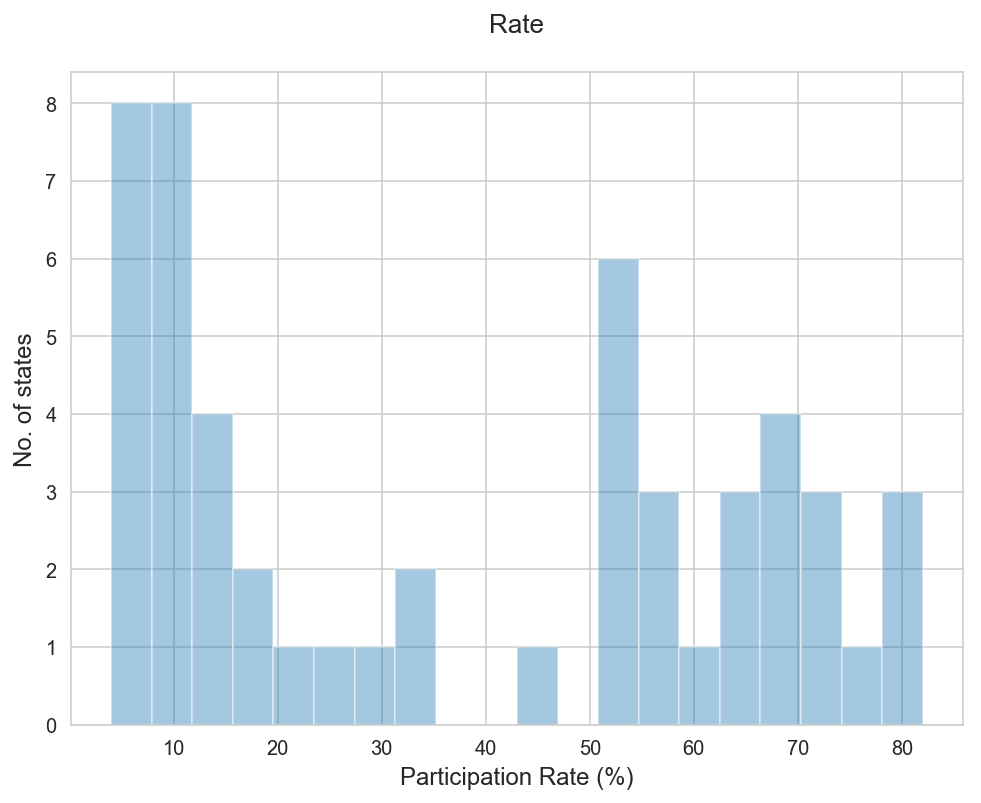

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.distplot(sat.Rate, bins=20, ax=ax, kde=False)
ax.set_xlabel('Participation Rate (%)', fontsize=12)
ax.set_ylabel('No. of states', fontsize=12)
ax.set_title('Rate\n', fontsize=13)

plt.show()


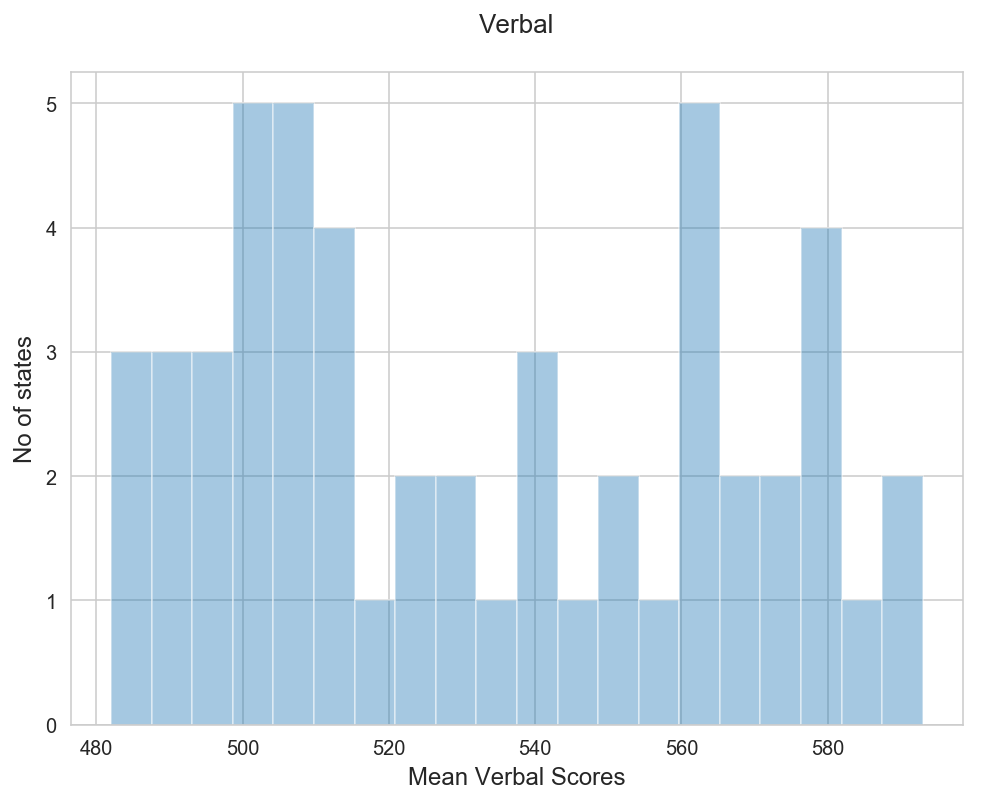

In [12]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.distplot(sat.Verbal, bins=20, ax=ax, kde=False)
ax.set_xlabel('Mean Verbal Scores', fontsize=12)
ax.set_ylabel('No of states', fontsize=12)
ax.set_title('Verbal\n', fontsize=13)

plt.show()


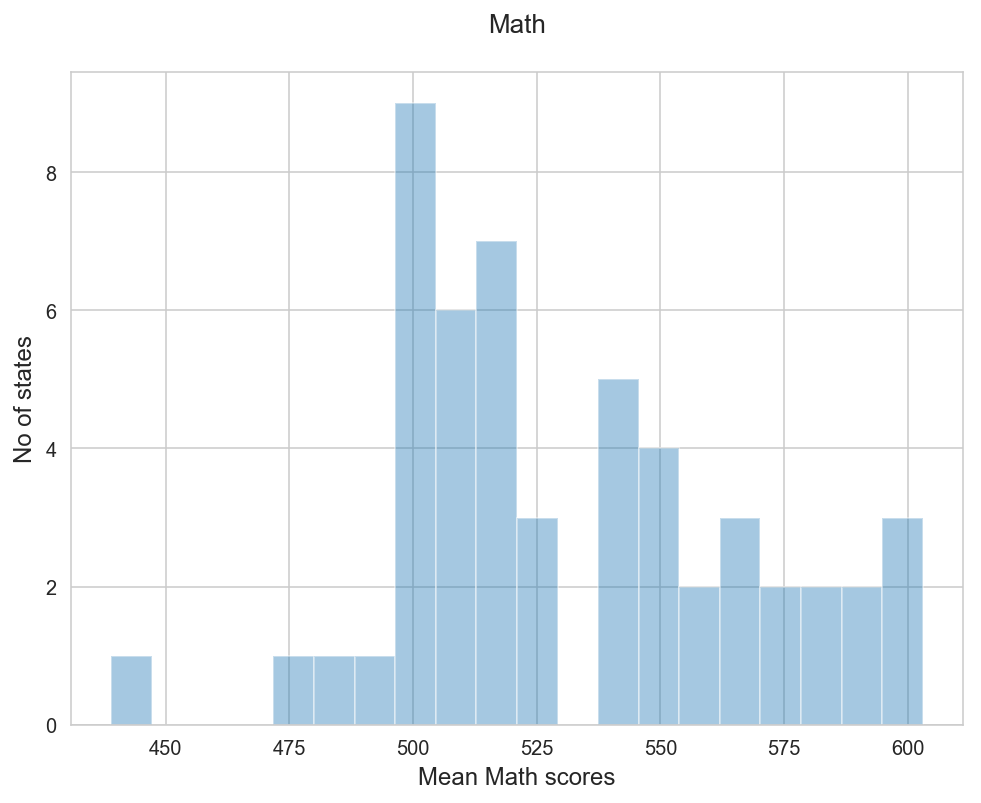

In [13]:

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.distplot(sat.Math, bins=20, ax=ax, kde=False)
ax.set_xlabel('Mean Math scores', fontsize=12)
ax.set_ylabel('No of states', fontsize=12)
ax.set_title('Math\n', fontsize=13)

plt.show()


### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

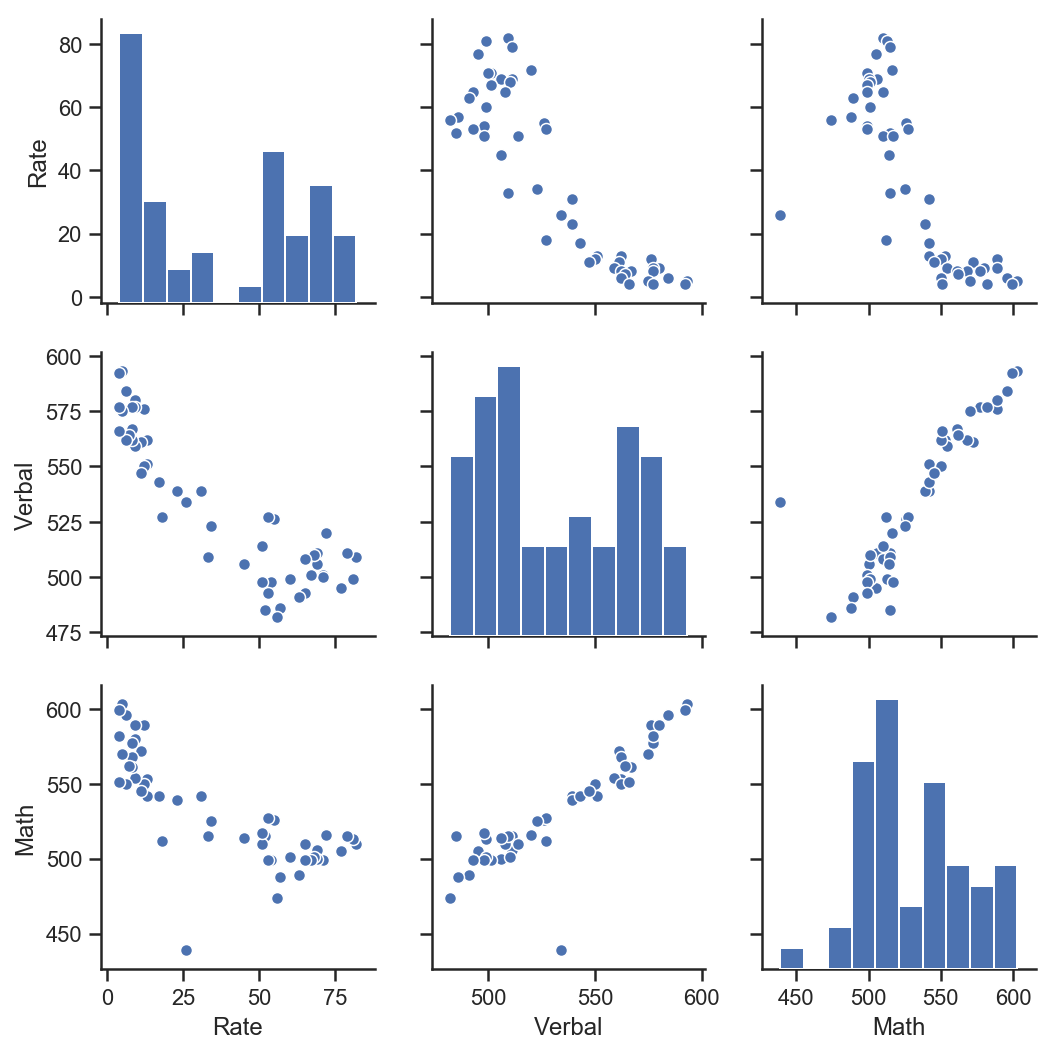

In [14]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(sat)
# pairplot shows that Math and Verbal have a strong positive correlation

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

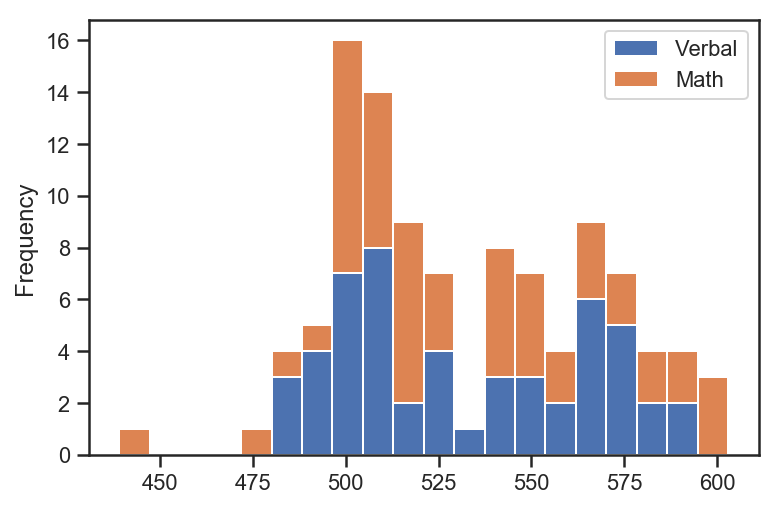

In [15]:
sat[['Verbal','Math']].plot(kind='hist', bins=20, stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

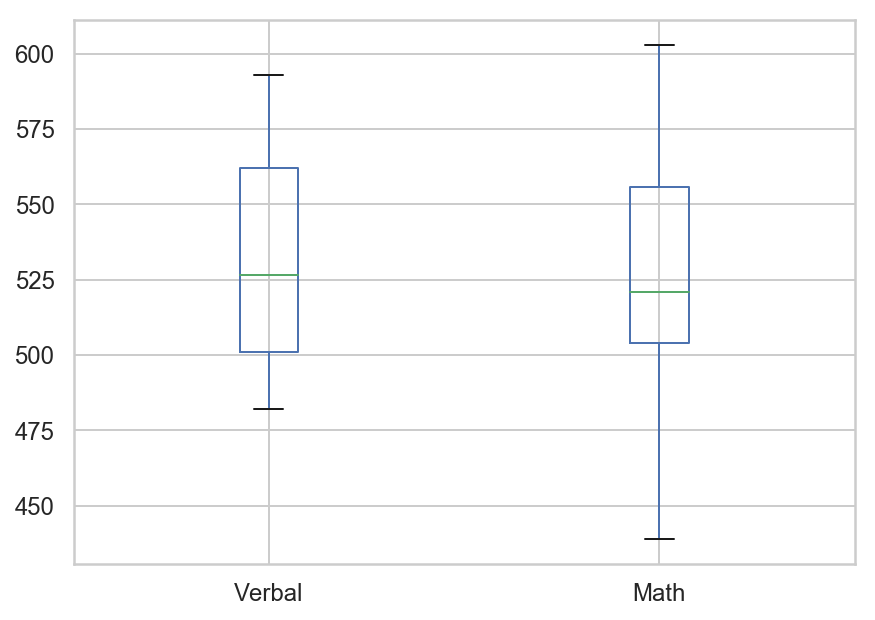

In [16]:
sns.set_style("whitegrid")
sat[['Verbal','Math']].plot(kind='box', fontsize='medium', figsize=(7,5))

# Benefits of using boxplot:
# It displays the distribution of data based on the five number summary: 
# minimum, first quartile, median, third quartile, and maximum. 
# It'll help to identify outliers and assess the mean, spread, and skew of the data

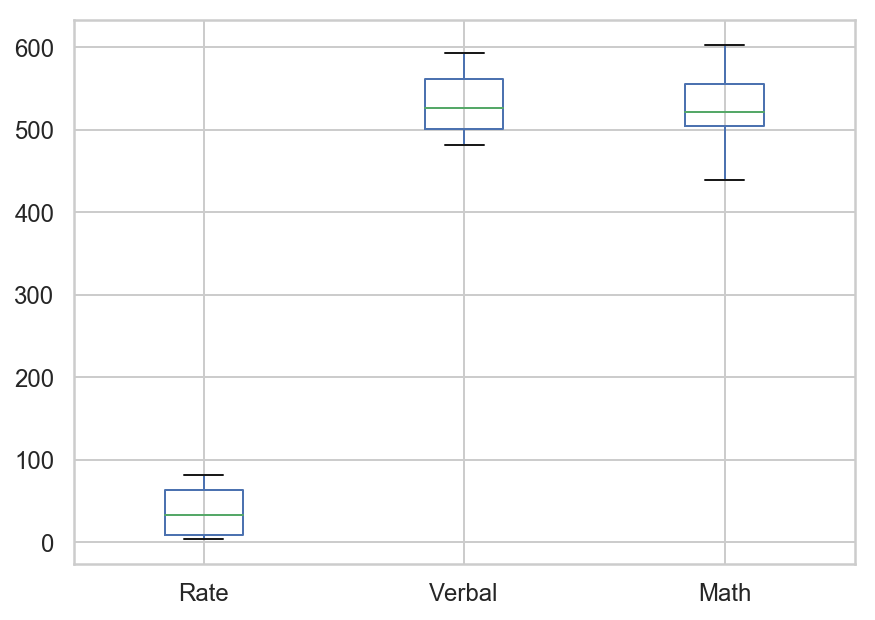

In [17]:
sns.set_style("whitegrid")
sat.plot(kind='box', fontsize='medium', figsize=(7,5))
# plotting Rate with Verbal and Math on the same chart will make it difficult 
# to access the distribution and outliers as the range for Rate is between 0 to 100
# as compared to between 400 and 600 for Verbal and Math

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


- Maximum Verbal score is 800 and Maximum Math scores is 800.
- Convert the values for mean Math and mean Verbal scores to percentage and plot on the graph. The range will be the same as Rate, between 0 to 100.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [18]:
sat.describe()
# average Verbal scores across states is 532

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


In [19]:
sat2 = sat[sat['Verbal']>532].sort_values(by='Verbal', ascending=False).reset_index(drop=True)
# new index to start at 1
sat2.index = sat2.index + 1
print(sat2.State.values)
sat2
# returns 24 states

['IA' 'ND' 'WI' 'MN' 'SD' 'KS' 'MO' 'IL' 'UT' 'OK' 'MS' 'LA' 'TN' 'AR'
 'NE' 'MI' 'AL' 'NM' 'KY' 'WY' 'ID' 'MT' 'CO' 'OH']


,State,Rate,Verbal,Math
1,IA,5,593,603
2,ND,4,592,599
3,WI,6,584,596
4,MN,9,580,589
5,SD,4,577,582
6,KS,9,577,580
7,MO,8,577,577
8,IL,12,576,589
9,UT,5,575,570
10,OK,8,567,561


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [20]:
sat3 = sat[sat['Verbal']>526.5].sort_values(by='Verbal', ascending=False).reset_index(drop=True)
# new index to start at 1
sat3.index = sat3.index + 1
print(sat3.State.values)
sat3

# Returns 26 states which is higher than 24 states with scores higher 
# than the mean verbal scores.
# Median Verbal scores across states is 526.5 (50 percentile).
# Mean Verbal scores across states is 532, thus mean > median, right skewed.

['IA' 'ND' 'WI' 'MN' 'KS' 'SD' 'MO' 'IL' 'UT' 'OK' 'MS' 'LA' 'NE' 'TN'
 'AR' 'MI' 'AL' 'NM' 'KY' 'WY' 'ID' 'CO' 'MT' 'OH' 'WV' 'WA']


,State,Rate,Verbal,Math
1,IA,5,593,603
2,ND,4,592,599
3,WI,6,584,596
4,MN,9,580,589
5,KS,9,577,580
6,SD,4,577,582
7,MO,8,577,577
8,IL,12,576,589
9,UT,5,575,570
10,OK,8,567,561


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [21]:
# When deep=True, Modifications to the data or indices of the copy will not be 
# reflected in the original object.
sat4 = sat.copy(deep = True)
# Set new column name as 'Diff'
sat4['Diff'] = sat4['Verbal'] - sat4['Math'] 
# set index to start at 1
# sat4.reset_index(drop = True).head(10)
# sat4.index = sat4.index +1
sat4.head(10)

,State,Rate,Verbal,Math,Diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [22]:
sat5 = sat4.sort_values(by='Diff', ascending=False).reset_index(drop=True)
sat5[0:10][['State','Diff']].head(3)

,State,Diff
0,OH,95
1,MS,15
2,WV,15


In [23]:
sat6 = sat4.sort_values(by='Diff', ascending=True).reset_index(drop=True)
sat6[0:10][['State','Diff']].head(3)

,State,Diff
0,HI,-30
1,CA,-19
2,NJ,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [24]:
sat7 = sat[['Verbal','Math']]
sat7.head()

,Verbal,Math
0,509,510
1,499,513
2,511,515
3,495,505
4,520,516


In [25]:
sat_correlations = sat7.corr(method='pearson')
print(sat_correlations)
# The correlation matrix tells us that both Verbal and Math 
# have an almost perfectly linear positive relationship

          Verbal      Math
Verbal  1.000000  0.899871
Math    0.899871  1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [26]:
sat.describe()

# for each column / variable:
# count refers to the total number of values 
# mean is the average of the values 
# std is the standard deviation  
# min is the minimum or lowest value
# 25% is the lower percentile 
# 50% is the median and 50 percentile
# 75% is the upper percentile
# max is the maximum or highest value

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

Q1. The covariance matrix is a symmetrical, square matrix and the values indicate
little to no linear relationship between two variables, X and Y.

Q2. The correlation is calculated by taking the covariance and 
scaling it by the standard deviations of X and Y.

Q3. Correlation matrix is preferred as it is a unitless measure and 
it is easier to interpret and compare correlations as it measures the
strength and direction of the linear relationship between two variables and it is bounded between -1 and 1.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [27]:
drug = pd.read_csv("./drug-use-by-age.csv")
# to display all 28 columns instead of the default 20
pd.set_option('display.max_columns', 30)
print(drug.shape)
drug.head()

(17, 28)


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [28]:
drug.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,0.6,50.0,3.2,3.0,0.6,4.0,8.3,13.0,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,0.4,66.0,1.8,2.0,0.4,3.5,5.9,22.0,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,0.1,280.0,0.6,3.0,0.3,10.0,4.2,12.0,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,0.1,41.0,0.3,44.0,0.2,13.5,2.5,12.0,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,0.0,120.0,0.1,2.0,0.0,-,0.6,24.0,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [29]:
drug.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [30]:
drug.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,inhalant-use,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,1.388235,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,0.927283,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,0.000000,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,0.600000,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,1.400000,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,2.000000,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,3.000000,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [31]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

>Dataset contains 17 rows, 28 cols.

>There is no null data.

> n is the number of individuals in each age / age group

>Age group appears: '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'
But since there is no way to either split up the data to individual age nor combine the individual age to an age band, will keep it as it is.

>There are 7 columns containing objects and 6 will need to be converted to type float64.
The 6 columns are; cocaine-frequency, crack-frequency, heroin-frequency, 
inhalant-frequency, oxycontin-frequency and meth-frequency.

>From data source, 'drug' use refers to the percentage of those in an age group 
who used each type of drug in the past 12 months. Frequency refers to Median number of times a user in an age group used 'drug' 
in the past 12 months.

> Alcohol is not considered a controlled substance in the U.S.  <br/>
Source: https://en.wikipedia.org/wiki/Controlled_Substances_Act


In [32]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [33]:
drug.age.unique() 

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype=object)

In [34]:
for col in drug:
    for row in drug.index.values:
        if drug.loc[row, col] == '-':
            drug.loc[row, col] = 0.0

Convert object columns to float type:
cocaine-frequency, crack-frequency, heroin-frequency, inhalant-frequency, oxycontin-
frequency and meth-frequency.

In [35]:
for col in ['cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']:
    drug[col] = drug[col].astype('float')

In [36]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [39]:
drug.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [40]:
# create a subset of age, n and the median number of times of drug use in 12 months
drug2 = drug[['age','alcohol-frequency','marijuana-frequency','cocaine-frequency','crack-frequency','heroin-frequency','hallucinogen-frequency','inhalant-frequency','pain-releiver-frequency','oxycontin-frequency','tranquilizer-frequency','stimulant-frequency','meth-frequency','sedative-frequency']].copy(deep='True')

In [41]:
drug2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 14 columns):
age                        17 non-null object
alcohol-frequency          17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-frequency          17 non-null float64
crack-frequency            17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-frequency        17 non-null float64
tranquilizer-frequency     17 non-null float64
stimulant-frequency        17 non-null float64
meth-frequency             17 non-null float64
sedative-frequency         17 non-null float64
dtypes: float64(13), object(1)
memory usage: 1.9+ KB


In [42]:
drug2.groupby('age').mean()[['alcohol-frequency']].sort_values(by='alcohol-frequency',ascending=False).reset_index().head(10)

,age,alcohol-frequency
0,65+,52.0
1,21,52.0
2,50-64,52.0
3,35-49,52.0
4,30-34,52.0
5,26-29,52.0
6,24-25,52.0
7,22-23,52.0
8,20,48.0
9,19,36.0


In [43]:
drug2.groupby('age').mean()[['marijuana-frequency']].sort_values(by='marijuana-frequency',ascending=False).reset_index().head(10)

,age,marijuana-frequency
0,30-34,72.0
1,20,60.0
2,19,60.0
3,24-25,60.0
4,22-23,52.0
5,50-64,52.0
6,26-29,52.0
7,18,52.0
8,21,52.0
9,35-49,48.0


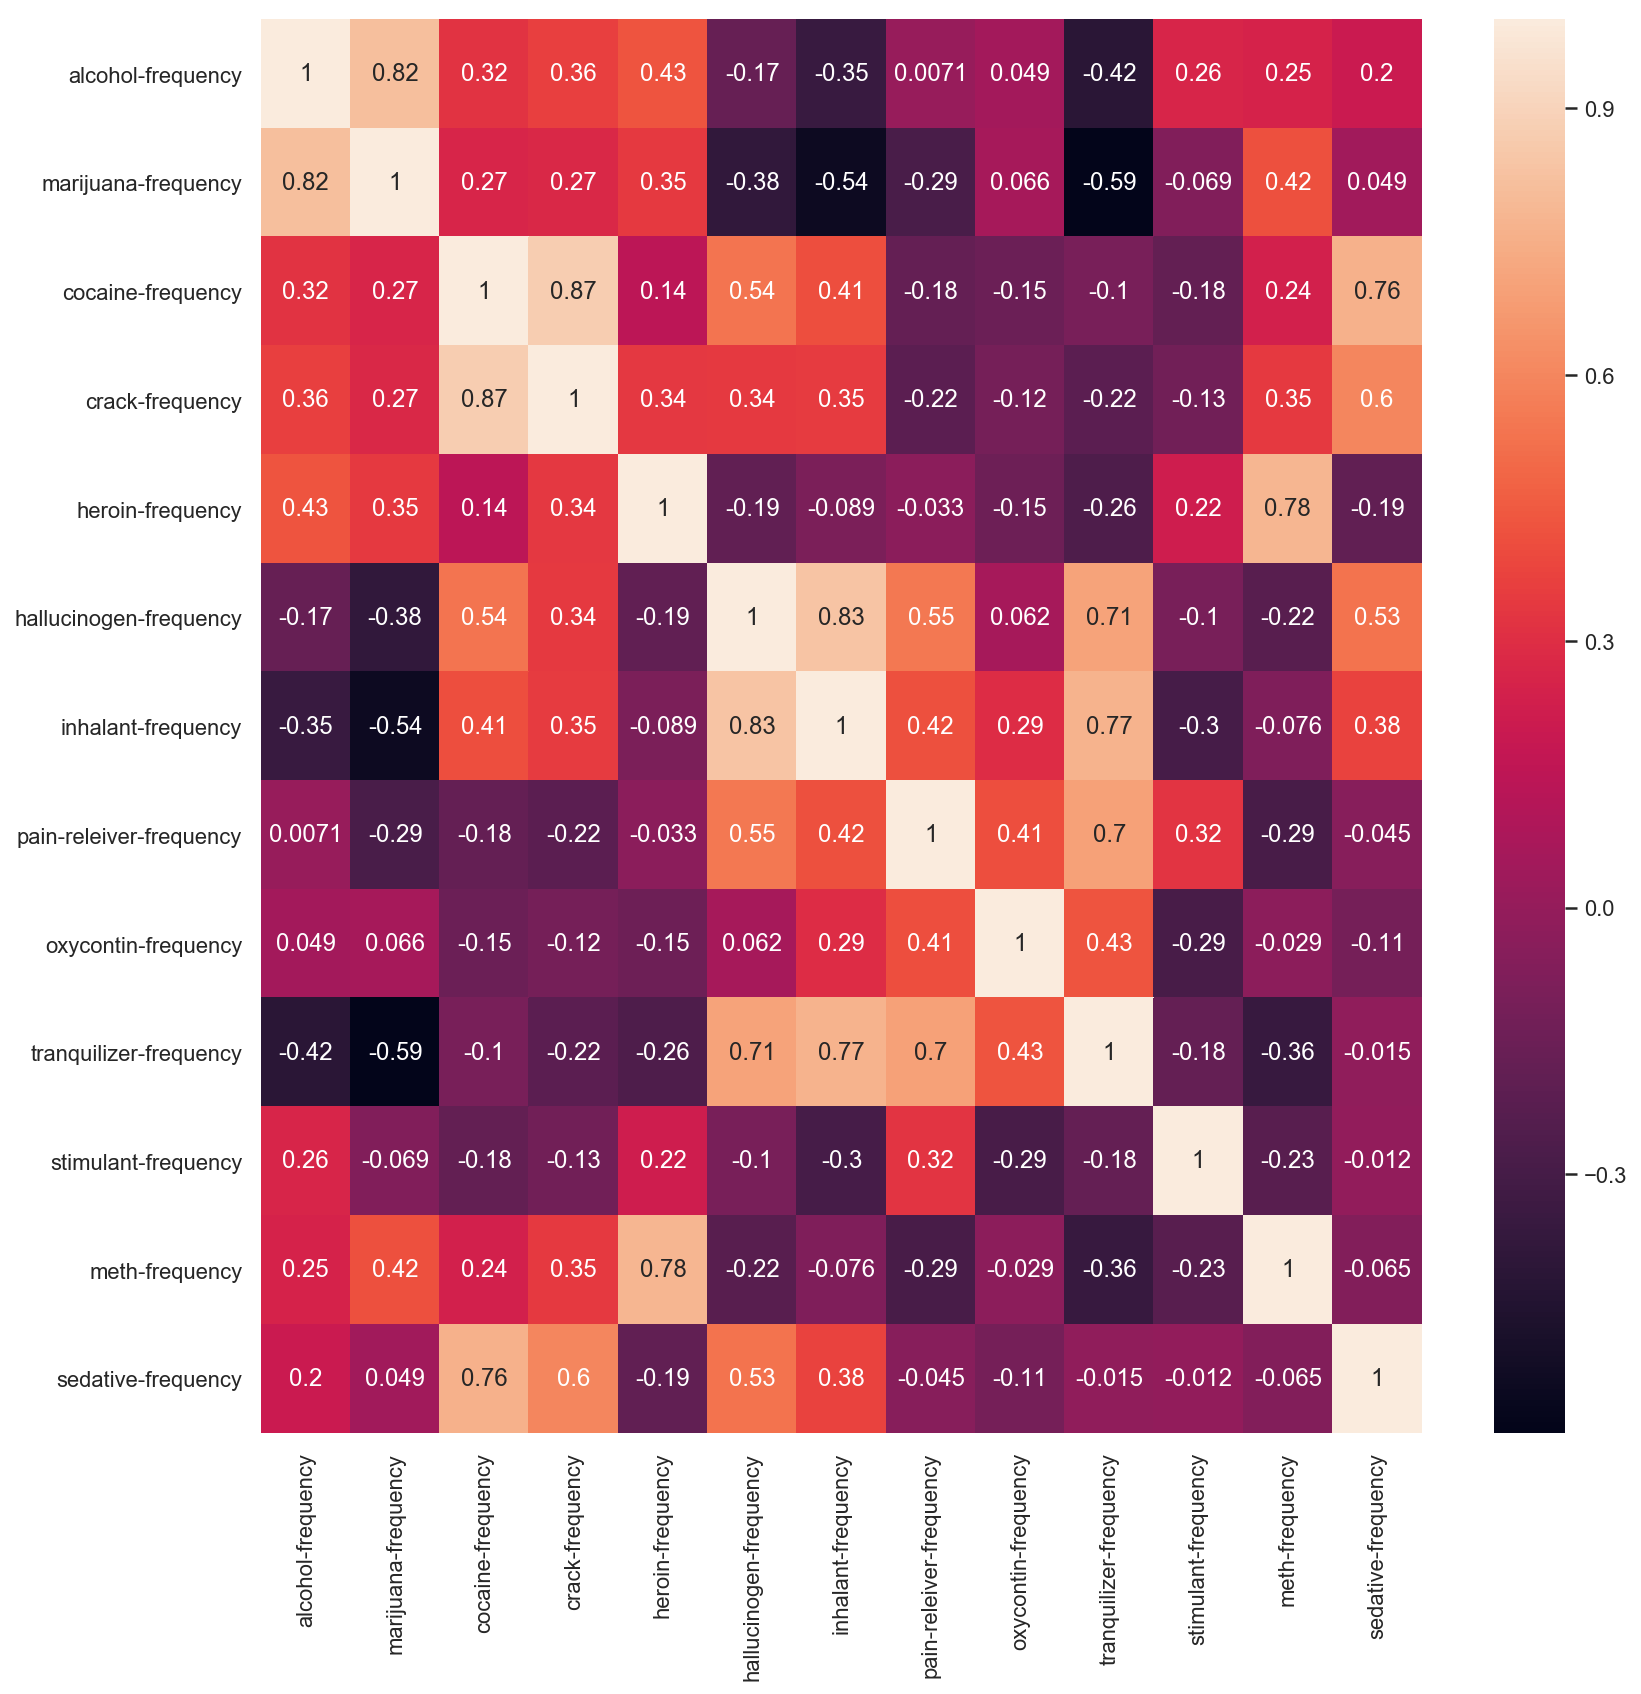

In [44]:
# Correlation matrix in heatmap form for all drug types
plt.figure(figsize=(13,13))
sns.heatmap(drug2.corr(), annot=True)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

Qn. Is there a positive correlation between alcohol and marijuana usage?

Description of deliverables: 
- To report if there is any correlation between alcohol and marijuana usage using Pearson’s Correlation Coefficient. 

Assumptions:
- Observations in each sample are normally distributed, as n values are large

H0 (null hypothesis): alcohol and marijuana are not positively correlated<br/>
H1 (alternative hypothesis): alcohol and marijuana are positively correlated

Set alpha (significance level) = 0.05


...

In [45]:
# know difference between ttest and ChiSquare
# define null hypothesis & alternative hypothesis

In [46]:
# Try: Correlations between variables

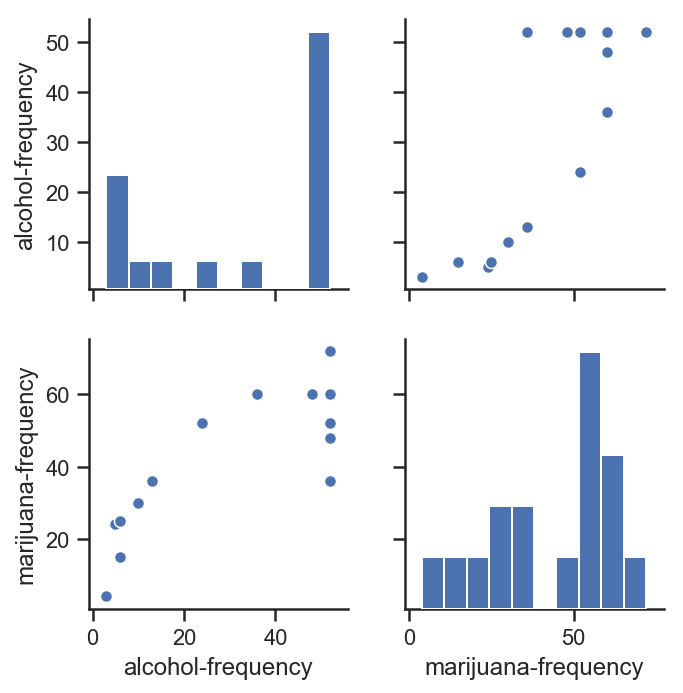

In [47]:
# pairplot showing relationship between alcohol and marijuana use
drug3 = drug2[['alcohol-frequency','marijuana-frequency']]
sns.set(style="ticks", color_codes=True)
sns.pairplot(drug3)

In [48]:
# Correlation matrix shows that Alcohol and marijuana usage is positively correlated
drug3.corr()

,alcohol-frequency,marijuana-frequency
alcohol-frequency,1.000000,0.818769
marijuana-frequency,0.818769,1.000000


In [49]:
from scipy.stats import pearsonr
data1 = drug3['alcohol-frequency']
data2 = drug3['marijuana-frequency']
corr, p = pearsonr(data1, data2)

In [50]:
corr, p

(0.8187685027986856, 5.8443759819067435e-05)

**Report**

Based on the p-value of 5.84e-05, which is lower than alpha, we can reject the null hypothesis.

There is statistically significant evidence that alcohol and marijuana usage is positively correlated at a significance level of 0.05.

...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [51]:
# Q1. Look at rate

In [52]:
sat.columns

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

In [53]:
sat['Rate'].unique()

array([82, 81, 79, 77, 72, 71, 69, 68, 67, 65, 63, 60, 57, 56, 55, 54, 53,
       52, 51, 34, 33, 31, 26, 23, 18, 17, 13, 12, 11,  9,  8,  7,  6,  5,
        4, 45])

In [54]:
sat['Rate'].value_counts()

9     3
4     3
8     3
5     2
65    2
12    2
69    2
53    2
6     2
51    2
13    2
11    2
71    2
77    1
63    1
72    1
81    1
68    1
67    1
79    1
26    1
82    1
23    1
60    1
17    1
31    1
33    1
34    1
18    1
45    1
52    1
54    1
55    1
56    1
57    1
7     1
Name: Rate, dtype: int64

In [55]:
sat['Rate'].describe()

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

In [56]:
Q1 = np.percentile(sat.Rate, 25)  
Q3 = np.percentile(sat.Rate, 75)  
IQR = Q3 - Q1
print(IQR)

54.5


In [57]:
3*IQR

163.5

In [58]:
count = 0
for col in sat['Rate']:
    if col < (Q1 - 1.5 * IQR):
         count += 1
    if col > (Q3 + 1.5 * IQR):
          count += 1
print(count)

# Alternative method: 
# print((sat['Rate'] < (Q1 - 1.5 * IQR)) | (sat['Rate'] > (Q3 + 1.5 * IQR)))

0



> An outlier is a point which falls more than 1.5 times the interquartile range (IQR) above the third quartile or below the first quartile. <br> For the rate variable, 3 * IQR = 3 * 54.5 = 163.5 <br>

> Since there are no points that fall outside 1.5 times the IQR, there are no outliers. 

In [59]:
# Our approach was to remove the outlier points by eliminating any points that were
# above (Mean + 2*SD) and any points below (Mean - 2*SD) before plotting the frequencies.

In [60]:
2*np.std(sat['Rate'])

54.07599298904718

Text(0.5, 0, 'Participation Rate (%)')

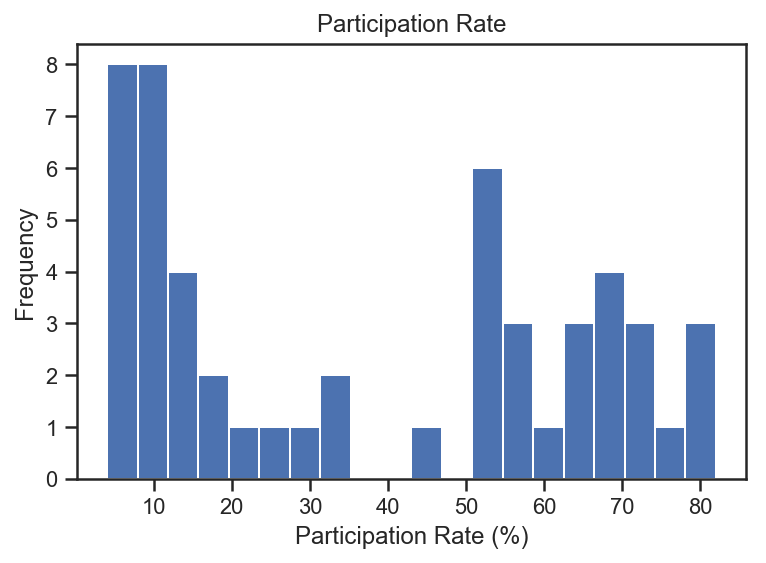

In [61]:
sat['Rate'].plot(kind='hist',style='b+', bins=20, title='Participation Rate')
plt.xlabel('Participation Rate (%)')

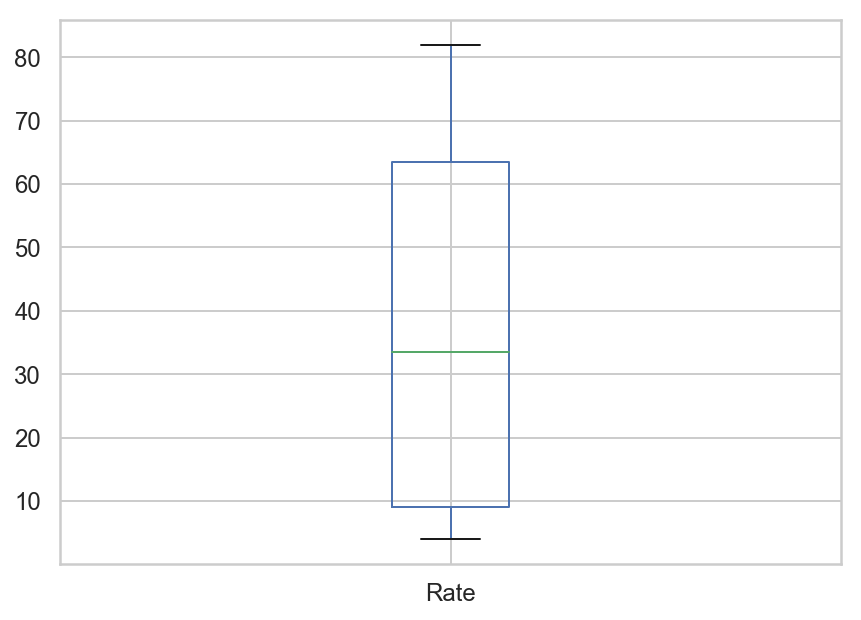

In [62]:
sns.set_style("whitegrid")
sat['Rate'].plot(kind='box', fontsize='medium', figsize=(7,5))

> Qn: Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

> Ans: If there are outliers and they are removed, the mean would be closer to the median and the standard deviation will be a smaller value.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [43]:
from scipy.stats import spearmanr
data1 = sat['Verbal']
data2 = sat['Math']
corr = spearmanr(data1, data2)
corr

SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

Spearman's correlation is of a larger value than Pearson's correlation.

If the relationship is that one variable increases when the other increases, but the amount is not consistent, the Pearson correlation coefficient is positive but less than +1. The Spearman coefficient still equals +1 as shown in the image below. <br>
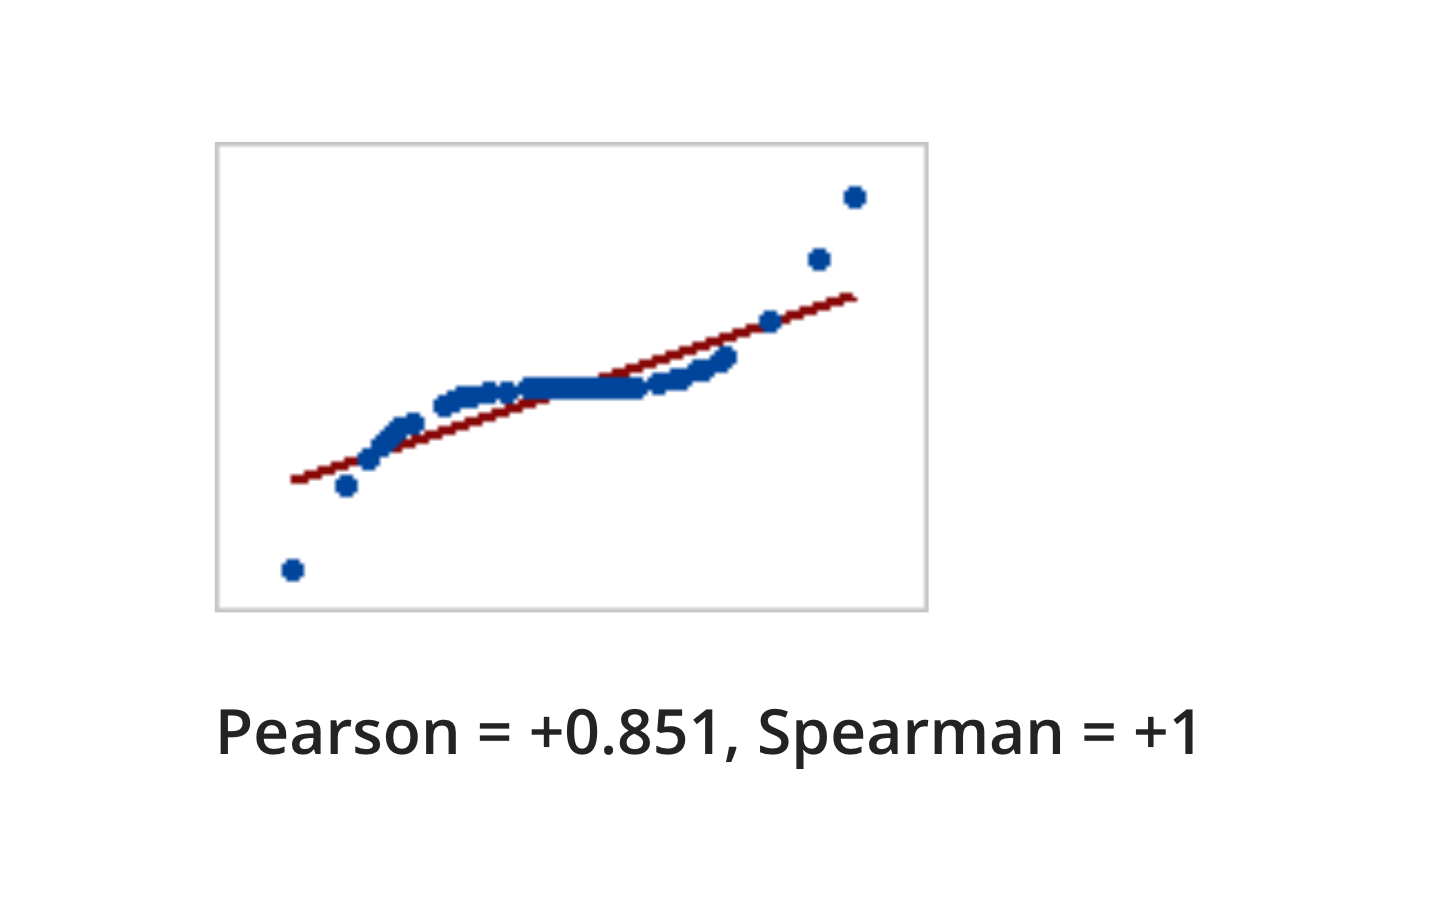

Process of calculating the spearman rank correlation:

1. Obtain the Verbal and Math scores of n students and put it into a pandas dataframe.
2. Find the ranks for each individual subject in a new column. Order the scores from greatest to smallest; assign the rank 1 to the highest score, 2 to the next highest and so on.
3. Add another column, 'd', to the data. 'd' is the difference between ranks. For example, the first student’s Verbal rank is 5 and Math rank is 3, so the difference is 2 points. 
4. Add another column and square the 'd' values.
5. Sum all the d-squared values (*di*).
6. Assuming the ranks are not tied. Insert the values into the formula below: 
<br>
<br>
1 – (6*di)/[n(n***2-1)]

Actual Formula:

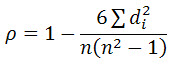

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [64]:
# drug use dataset